In [82]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [83]:
########################################
# ALTES MODELL:
########################################

values = np.loadtxt('vl5_data.csv')
t_u_alt = np.array(values[:,1])
t_c_alt = np.array(values[:,0])

def model_alt(t_u_alt, w_alt, b_alt):
    return w_alt * t_u_alt + b_alt

def loss_fn_alt(t_p_alt, t_c_alt):
    sq_diff_alt = (t_p_alt - t_c_alt)**2
    return sq_diff_alt.mean()

def dloss_fn_alt(t_p_alt, t_c_alt):
    return 2*(t_p_alt-t_c_alt) / t_p_alt.size

def dmodel_dw_alt(t_u_alt, w_alt, b_alt):
    return t_u_alt

def dmodel_db_alt(t_u_alt, w_alt, b_alt):
    return 1.0

def grad_fn_alt(t_u_alt, t_c_alt, t_p_alt, w_alt, b_alt):
    dloss_dtp_alt = dloss_fn_alt(t_p_alt, t_c_alt)
    dloss_dw_alt = dloss_dtp_alt * dmodel_dw_alt(t_u_alt, w_alt, b_alt)
    dloss_db_alt = dloss_dtp_alt * dmodel_db_alt(t_u_alt, w_alt, b_alt)
    return np.array([dloss_dw_alt.sum(), dloss_db_alt.sum()])


def training_loop_alt(n_epochs_alt, learning_rate_alt, params_alt, t_u_alt, t_c_alt):
    for i in range(n_epochs_alt):
        t_p_alt = model_alt(t_u_alt, *params_alt)
        loss = loss_fn_alt(t_p_alt,t_c_alt)
        grad_alt = grad_fn_alt(t_u_alt, t_c_alt, t_p_alt, *params_alt)
        params_alt = params_alt - learning_rate_alt * grad_alt
        if i % 500 == 0 or i == 1:
            print('Epoch %d, Loss %f' % (i, float(loss)))
    return params_alt

w_alt = np.ones(1)
b_alt = np.zeros(1)
learning_rate_alt = 1e-2

t_un_alt = t_u_alt * 0.1
params_alt = training_loop_alt(5000, learning_rate_alt, np.array([w_alt, b_alt]).flatten(), t_un_alt, t_c_alt)

t_p_alt = model_alt(t_un_alt, *params_alt)


Epoch 0, Loss 80.364345
Epoch 1, Loss 37.574914
Epoch 500, Loss 7.843380
Epoch 1000, Loss 3.825484
Epoch 1500, Loss 3.091632
Epoch 2000, Loss 2.957597
Epoch 2500, Loss 2.933116
Epoch 3000, Loss 2.928645
Epoch 3500, Loss 2.927828
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652


In [84]:
########################################
# NEUES MODELL:
########################################
values = np.loadtxt('vl5_data.csv')
t_u = torch.tensor(values[:,1])
t_c = torch.tensor(values[:,0])

In [85]:
params = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)

In [86]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

def dloss_fn(t_p, t_c):
    return 2*(t_p-t_c) / t_p.size(0)

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw(t_u ** 2, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])


In [87]:
t_un = 0.1 * t_u

In [88]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()


In [89]:
def training_loop(n_epochs, optimizer, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        loss = loss_fn(train_t_p, train_t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0 or epoch == 1:
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Loss %f, val-Loss %f' % (epoch, float(loss), float(val_loss)))
    return params



In [90]:
n_samples = t_u.shape[0]
n_val = int(0.5 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [91]:
import torch.optim as optim

Epoch 1, Loss 120.322600, val-Loss 30.456758
Epoch 500, Loss 2.353396, val-Loss 13.478260
Epoch 1000, Loss 1.609959, val-Loss 8.061659
Epoch 1500, Loss 1.597846, val-Loss 7.468405
Epoch 2000, Loss 1.594193, val-Loss 7.376446
Epoch 2500, Loss 1.589727, val-Loss 7.283676
Epoch 3000, Loss 1.584494, val-Loss 7.170373
Epoch 3500, Loss 1.578626, val-Loss 7.035912
Epoch 4000, Loss 1.572365, val-Loss 6.881253
Epoch 4500, Loss 1.566069, val-Loss 6.709525
Epoch 5000, Loss 1.560187, val-Loss 6.526596


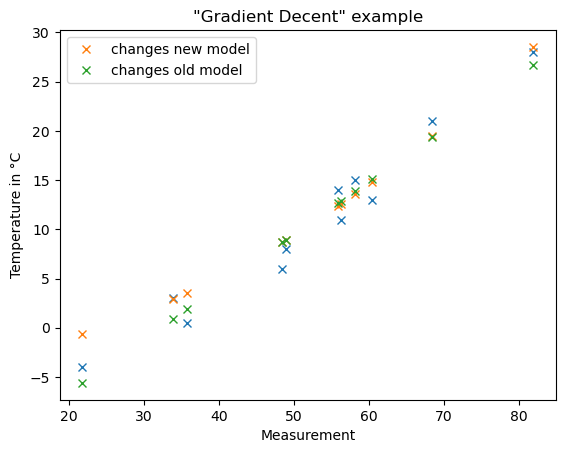

FRAGE: Ist der „Loss“ mit dem neuen Modell größer oder kleiner? 
Vergleicht man den "Loss" der beiden Modell, dann lässt sich feststellen, dass der "Loss" mit dem neuen Modell kleiner ist.

FRAGE: Sieht das Ergebnis mit dem neuen Modell besser oder schlechter aus? 
Ein Ziel ist es, den Verlust ("Loss") neidrig zu halten. Da dieser beim neuen Modell neidriger ist, haben wir in der Hinsicht ein besseres neues Modell. 
Zudem haben die Trainings- und Validierungsverluste unterschiedliche absolute Werte, aber ähnliche Tendenzen:  
Das Overfitting ist unter Kontrolle.


In [92]:
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

params = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    train_t_u = train_t_un, 
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)
t_p = model(t_un, params[0], params[1], params[2])

plt.plot(t_u,t_c,'x')
plt.plot(t_u.detach().numpy(),t_p.detach().numpy(),'x', label="changes new model")
plt.plot(t_u_alt, t_p_alt,'x', label="changes old model")
plt.title('"Gradient Decent" example')
plt.xlabel('Measurement')
plt.ylabel('Temperature in °C')
plt.legend(loc="upper left")
plt.show()


print('FRAGE: Ist der „Loss“ mit dem neuen Modell größer oder kleiner? ')
print('Vergleicht man den "Loss" der beiden Modell, dann lässt sich feststellen, dass der "Loss" mit dem neuen Modell kleiner ist.'+'\n' )
print('FRAGE: Sieht das Ergebnis mit dem neuen Modell besser oder schlechter aus? ')
print('Ein Ziel ist es, den Verlust ("Loss") neidrig zu halten. Da dieser beim neuen Modell neidriger ist, haben wir in der Hinsicht ein besseres neues Modell. '+'\n' +
      'Zudem haben die Trainings- und Validierungsverluste unterschiedliche absolute Werte, aber ähnliche Tendenzen:  '+'\n'+
      'Das Overfitting ist unter Kontrolle.')


